In [197]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [186]:
def gen_paths(S0, r, sigma, T, M, I):
    dt = float(T) / M
    paths = np.zeros((M + 1, I), np.float64)
    paths[0] = S0
    for t in range(1, M + 1):
        rand = np.random.standard_normal(I)
        paths[t] = paths[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt +
                                         sigma * np.sqrt(dt) * rand)
    return paths

In [187]:

r = 0.035
sigma = 0.1
T = 1
N = 365*2
deltat = T / N
i = 10000

In [192]:
np.random.seed(123)
S0 = 1.22
paths_eur = gen_paths(S0, r, sigma, T, N, i)
np.random.seed(133)
S0 = 1.7
paths_gbp = gen_paths(S0, r, sigma, T, N, i)

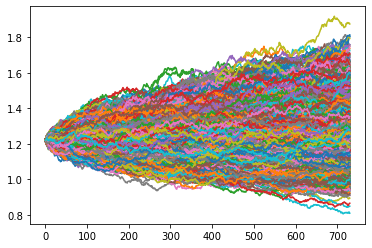

In [193]:
plt.plot(paths_eur)
plt.show()

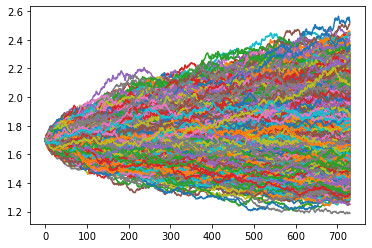

In [194]:
plt.plot(paths_gbp)
plt.show()

In [202]:
prices_eur = paths_eur[-1]
prices_gbp = paths_gbp[-1]

In [203]:
df = pd.DataFrame(prices_gbp)

## save to xlsx file

filepath = 'simulation_data.xlsx'

df_eur = pd.DataFrame(prices_eur)
df_gbp = pd.DataFrame(prices_gbp)

In [207]:
from openpyxl import load_workbook

with pd.ExcelWriter(filepath, engine='openpyxl') as writer:
    writer.book = load_workbook(filepath)
    df_eur.to_excel(writer, sheet_name='fx_risk_eur')
    df_gbp.to_excel(writer, sheet_name='fx_risk_gbp')